In [2]:
import matplotlib.pyplot as plt

import numpy as np

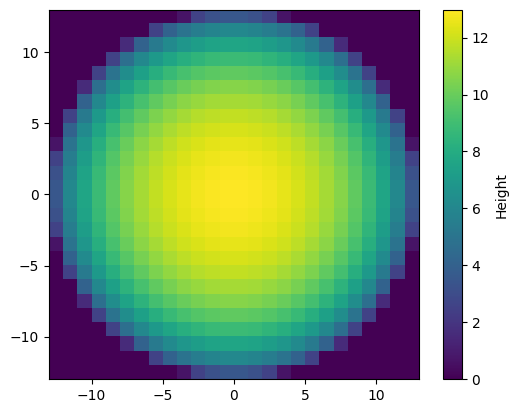

In [40]:
R = 13
data = np.zeros((2 * R, 2 * R))
for i in range(2 * R):
    for j in range(2 * R):
        x = i + 0.5 - R
        y = j + 0.5 - R
        data[i, j] = np.sqrt(np.maximum(R**2 - x**2 - y**2, 0))
plt.imshow(data, cmap='viridis', extent=(-R, R, -R, R))
plt.colorbar(label='Height')


In [41]:
blocks = [
    {
        "values": [[1,1], [1,1]],
        "name": "Full",
        "id": 0,
    },
    {
        "values": [[0,0], [0,0]],
        "name": "Empty",
        "id": -1,
    },
    {
        "values": [[0.5, 0.5], [0.5, 0.5]],
        "name": "Slab",
        "id": 1,
    },
    {
        "values": [[0.5, 0.5], [1,1]],
        "name": "Stair1",
        "id": 3,
    },
    {
        "values": [[0.5, 1], [0.5,1]],
        "name": "Stair2",
        "id": 4,
    },
    {
        "values": [[1,1], [0.5, 0.5]],
        "name": "Stair3",
        "id": 5,
    },
    {
        "values": [[1,0.5], [1,0.5]],
        "name": "Stair4",
        "id": 6,
    },
    {
        "values": [[0.5, 0.5], [0.5,1]],
        "name": "OuterCornerStair1",
        "id": 11,
    },
    {
        "values": [[0.5, 0.5], [1,0.5]],
        "name": "OuterCornerStair2",
        "id": 12,
    },
    {
        "values": [[1,0.5], [0.5,0.5]],
        "name": "OuterCornerStair3",
        "id": 13,
    },
    {
        "values": [[0.5,1], [0.5,0.5]],
        "name": "OuterCornerStair4",
        "id": 14,
    },
    {   
        "values": [[0.5, 1], [1, 1]],
        "name": "InnerCornerStair1",
        "id": 19,
    },
    {
        "values": [[1, 1], [0.5, 1]],
        "name": "InnerCornerStair2",
        "id": 20,
    },
    {
        "values": [[1, 1], [1, 0.5]],
        "name": "InnerCornerStair3",
        "id": 21,
    },
    {
        "values": [[1, 0.5], [1, 1]],
        "name": "InnerCornerStair4",
        "id": 22,
    },
]

In [42]:
def assign_block(vals: np.ndarray) -> tuple[int, int]:
    lift = int(np.max(vals / 2)) * 2
    vals = vals - lift
    min_error = -1
    selected_id = -1
    for i, block in enumerate(blocks):
        error = ((np.array(block["values"]) - vals) ** 2).sum()
        if error < min_error or min_error == -1:
            min_error = error
            selected_id = i
    return selected_id, lift


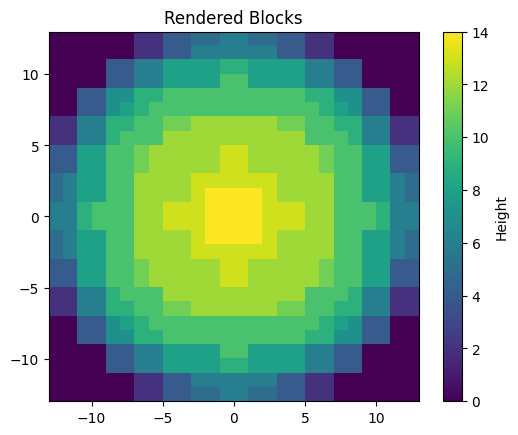

In [ ]:

lifts = np.zeros((R, R))
block_ids = np.zeros((R, R), dtype=int)

for i in range(R):s
    for j in range(R):
        vals = data[(2 * i):(2 * (i + 1)), (2 * j):(2 * (j + 1))] 
        block_id, lift = assign_block(vals)
        lifts[i, j] = lift
        block_ids[i, j] = block_id
data_render = np.zeros((2 * R, 2 * R))
for i in range(R):
    for j in range(R):
        block = blocks[int(block_ids[i, j])]
        data_render[(2 * i):(2 * (i + 1)), (2 * j):(2 * (j + 1))] = (2 * np.array(block["values"])) + lifts[i, j]
plt.imshow(data_render, cmap='viridis', extent=(-R, R, -R, R))
plt.colorbar(label='Height')
plt.title("Rendered Blocks")
plt.show()